In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os

import numpy as np

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [4]:
data = np.loadtxt('/content/drive/MyDrive/SIS 420 Inteligencia Artificial/Datasets/Video_Games_preparado.txt', delimiter=",",skiprows=1)
#print(data)
X = data[:, :1]
y = data[:, 1]
m = y.size
print(m)
for i in range(20):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

16718
       2      1985
       1      2008
       1      2009
       3      1996
       3      1989
       4      2006
       1      2006
       1      2009
       2      1984
       4      2005
       4      2005
       3      1999
       1      2007
       5      2010
       1      2009
       6      2013
       7      2004
       8      1990
       4      2005
       4      2006


In [6]:
def plotData(x, y):

    fig = pyplot.figure()

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Puntuacion de usuarios')
    pyplot.xlabel('ventas globales')


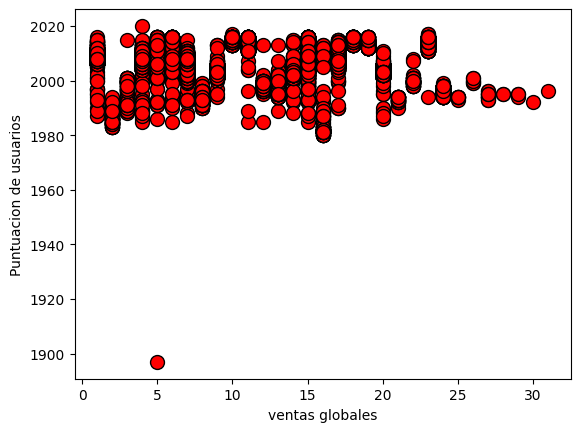

In [7]:
plotData(X, y)

In [8]:
X = np.concatenate([X, X * X], axis=1)

In [9]:
print(X)

[[  2.   4.]
 [  1.   1.]
 [  1.   1.]
 ...
 [ 23. 529.]
 [  9.  81.]
 [ 23. 529.]]


In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
X_norm, mu, sigma = featureNormalize(X)

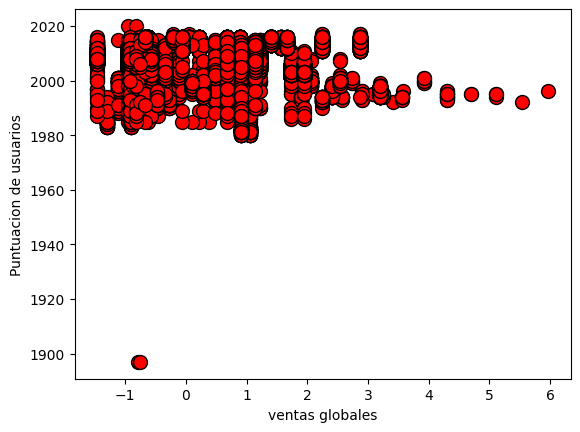

In [12]:
plotData(X_norm, y)

In [13]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
print(X)

[[ 1.         -1.29262617 -0.89991968]
 [ 1.         -1.46064928 -0.92145261]
 [ 1.         -1.46064928 -0.92145261]
 ...
 [ 1.          2.23585915  2.86834305]
 [ 1.         -0.1164644  -0.34724114]
 [ 1.          2.23585915  2.86834305]]


In [16]:
def computeCostMulti(X, y, theta):

    m = y.shape[0]

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    m = y.shape[0]

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [2006.3956813    -3.68223659    3.14908459]


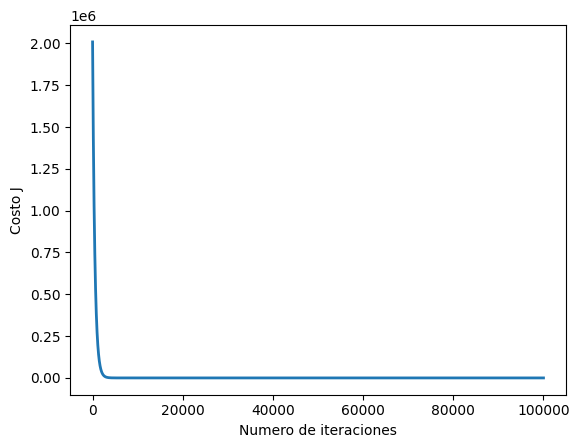

In [18]:
alpha = 0.001
num_iters = 100000

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))



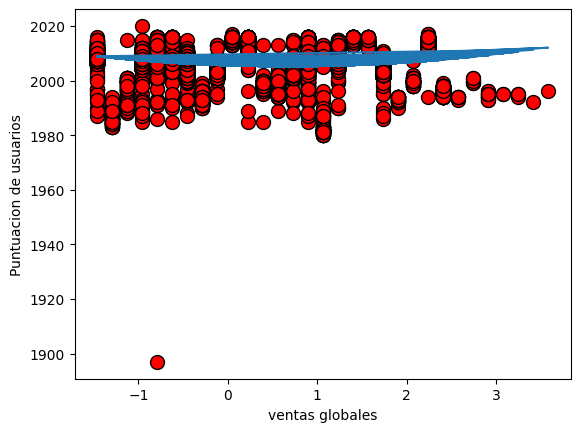

In [19]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [20]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [21]:
X_array[1:3]
print(np.dot(X_array, theta))

2007.1953738421703


Ecuacion de la Normal

In [22]:
data = np.loadtxt('/content/drive/MyDrive/SIS 420 Inteligencia Artificial/Datasets/Video_Games_preparado.txt', delimiter=",",skiprows=1)
X = data[:, :1]
y = data[:, 1]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [23]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [24]:
theta = normalEqn(X, y);

print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


Theta calculado a partir de la ecuación de la normal: [ 2.00953403e+03 -6.34429205e-01  2.32748930e-02]


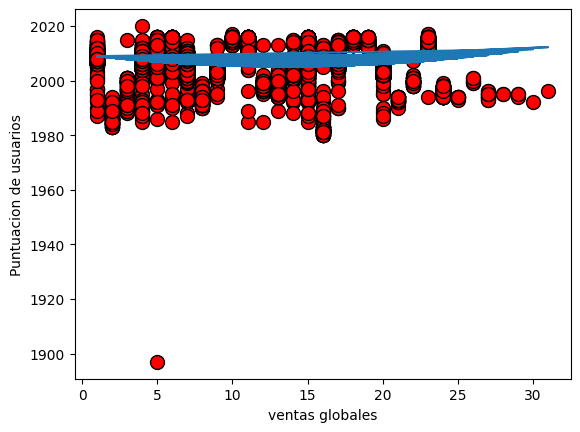

In [25]:
plotData(X[:, 1], y)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')